In [ ]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
os.listdir()

['.config',
 'smote_resampled_data.csv',
 'drive',
 'mapped_values.csv',
 'fraud_map.html',
 'sample_data']

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DataCoSupplyChainDataset_v2.csv',encoding='ISO-8859-1')
df.shape

(180519, 41)

In [ ]:
df.dtypes

Type                              object
Days for shipping (real)           int64
Days for shipment (scheduled)      int64
Delivery Status                   object
Product Sales                    float64
Late_delivery_risk                 int64
Category Name                     object
New Category Name                 object
Customer Id                        int64
Customer City                     object
Customer Country                  object
Customer Segment                  object
Customer State                    object
Customer Street                   object
Customer Zipcode                   int64
Department Id                      int64
Department Name                   object
Latitude                         float64
Longitude                        float64
Market                            object
Order City                        object
Order Country                     object
order date (DateOrders)           object
Order Id                           int64
Order Item Discount              float64
Order Item Discount Rate         float64
Order Item Id                      int64
Order Item Profit Ratio          float64
Order Item Quantity                int64
Sales                            float64
Sales After Discount             float64
Order Profit Per Order           float64
Order Region                      object
Order State                       object
Order Status                      object
Product Card Id                    int64
Product Category Id                int64
Product Name                      object
Product Price                    float64
shipping date (DateOrders)        object
Shipping Mode                     object
dtype: object

## Observation of Variable Types

Observe the data type for columns that are supposed to be numerical and see if we need to transform anything

In [ ]:
numerical_columns = [
    df.columns[1],  # B
    df.columns[2],  # C
    df.columns[4],  # E
    df.columns[24], # Y
    df.columns[25], # Z
    df.columns[27], # AB
    df.columns[28], # AC
    df.columns[29], # AD
    df.columns[30], # AE
    df.columns[31], # AF
    df.columns[38]  # AN
]

# Print the column names
df[numerical_columns].dtypes

Days for shipping (real)           int64
Days for shipment (scheduled)      int64
Product Sales                    float64
Order Item Discount              float64
Order Item Discount Rate         float64
Order Item Profit Ratio          float64
Order Item Quantity                int64
Sales                            float64
Sales After Discount             float64
Order Profit Per Order           float64
Product Price                    float64
dtype: object

Observe the data type for columns that are supposed to be date and convert them appropriately

In [ ]:
date_columns = [
    df.columns[22],
    df.columns[39]
]

# Print the column names
df[date_columns].dtypes

# Convert the specified columns to datetime
df[date_columns] = df[date_columns].apply(pd.to_datetime, errors='coerce')
df['Order_Year'] = df['order date (DateOrders)'].dt.year
df['Order Month'] = df['order date (DateOrders)'].dt.month
df['Order Quarter'] = df['order date (DateOrders)'].dt.quarter

df['Shipping_Year'] = df['shipping date (DateOrders)'].dt.year
df['Shipping Month'] = df['shipping date (DateOrders)'].dt.month
df['Shipping Quarter'] = df['shipping date (DateOrders)'].dt.quarter


# Check the data types after conversion
print(df[date_columns].dtypes)

order date (DateOrders)       datetime64[ns]
shipping date (DateOrders)    datetime64[ns]
dtype: object


In [ ]:
# df = df[(df['order date (DateOrders)'].dt.year == 2018)]
df

Type  Days for shipping (real)  Days for shipment (scheduled)  \
0        PAYMENT                         5                              4   
1        PAYMENT                         5                              4   
2       TRANSFER                         6                              2   
3          DEBIT                         2                              4   
4          DEBIT                         2                              4   
...          ...                       ...                            ...   
180514  TRANSFER                         2                              1   
180515  TRANSFER                         2                              1   
180516  TRANSFER                         2                              1   
180517  TRANSFER                         2                              1   
180518  TRANSFER                         2                              1   

         Delivery Status  Product Sales  Late_delivery_risk  \
0          Late delivery     314.640015                   1   
1          Late delivery     311.359985                   1   
2          Late delivery     309.720001                   1   
3       Advance shipping     304.809998                   0   
4       Advance shipping     298.250000                   0   
...                  ...            ...                 ...   
180514     Late delivery     399.980011                   1   
180515     Late delivery     395.980011                   1   
180516     Late delivery     391.980011                   1   
180517     Late delivery     387.980011                   1   
180518     Late delivery     383.980011                   1   

               Category Name    New Category Name  Customer Id  \
0           Kids' Golf Clubs          Kids & Toys        20755   
1            Women's Apparel      Women's Apparel        19492   
2            Women's Apparel      Women's Apparel        19491   
3                     Cleats     Sports Equipment        19490   
4                     Cleats     Sports Equipment        19489   
...                      ...                  ...          ...   
180514  Indoor/Outdoor Games  Outdoor & Adventure         1005   
180515      Cardio Equipment     Sports Equipment         9141   
180516        Men's Footwear        Mens' Apparel          291   
180517               Fishing  Outdoor & Adventure         2813   
180518  Indoor/Outdoor Games  Outdoor & Adventure         7547   

           Customer City  ...                               Product Name  \
0       South Ozone Park  ...          Garmin Forerunner 910XT GPS Watch   
1       South Ozone Park  ...       Nike Men's Dri-FIT Victory Golf Polo   
2                 Caguas  ...       Nike Men's Dri-FIT Victory Golf Polo   
3                 Caguas  ...           Perfect Fitness Perfect Rip Deck   
4                 Caguas  ...           Perfect Fitness Perfect Rip Deck   
...                  ...  ...                                        ...   
180514         Riverside  ...           O'Brien Men's Neoprene Life Vest   
180515         Riverside  ...          Nike Men's Free 5.0+ Running Shoe   
180516         Riverside  ...    Nike Men's CJ Elite 2 TD Football Cleat   
180517         Riverside  ...  Field & Stream Sportsman 16 Gun Fire Safe   
180518         Riverside  ...           O'Brien Men's Neoprene Life Vest   

       Product Price shipping date (DateOrders)   Shipping Mode  Order_Year  \
0         399.989990        2017-09-30 09:06:00  Standard Class        2017   
1          50.000000        2017-09-30 09:06:00  Standard Class        2017   
2          50.000000        2017-09-30 08:56:00    Second Class        2017   
3          59.990002        2017-09-30 07:53:00  Standard Class        2017   
4          59.990002        2017-09-30 07:53:00  Standard Class        2017   
...              ...                        ...             ...         ...   
180514     49.980000        2015-02-01 00:08:00     First Class        

Observe the data type for all other columns that were not identified in date & numerical columns

In [ ]:
exclude_columns = numerical_columns + date_columns
remaining_columns = [col for col in df.columns if col not in exclude_columns]
df[remaining_columns].dtypes

Type                    object
Delivery Status         object
Late_delivery_risk       int64
Category Name           object
New Category Name       object
Customer Id              int64
Customer City           object
Customer Country        object
Customer Segment        object
Customer State          object
Customer Street         object
Customer Zipcode         int64
Department Id            int64
Department Name         object
Latitude               float64
Longitude              float64
Market                  object
Order City              object
Order Country           object
Order Id                 int64
Order Item Id            int64
Order Region            object
Order State             object
Order Status            object
Product Card Id          int64
Product Category Id      int64
Product Name            object
Shipping Mode           object
Order_Year               int32
Order Month              int32
Order Quarter            int32
Shipping_Year            int32
Shipping Month           int32
Shipping Quarter         int32
dtype: object

Identify those that are of int type and change them to be string format.

In [ ]:
int_columns_in_remaining = df[remaining_columns].select_dtypes(include=['int64']).columns.tolist()
df[int_columns_in_remaining] = df[int_columns_in_remaining].astype(str)

df[int_columns_in_remaining].dtypes

Late_delivery_risk     object
Customer Id            object
Customer Zipcode       object
Department Id          object
Order Id               object
Order Item Id          object
Product Card Id        object
Product Category Id    object
dtype: object

# Data Cleaning

Filtering on Order Status for Fraud Detection System

In [ ]:
df['Order Status'].unique()
filtered_df = df

Based on the above, we have different kinds of order status. As we are doing a fraud detection, there are some assumptions made before we filter;

1) SUSPECTED_FRAUD is our '1' class in FRAUD
2) PENDING_PAYMENT , PENDING , ON_HOLD , PROCESSING AND CANCELED would be excluded as we are not sure if it is a FRAUD or not.
3) Final comparison would be SUSPECTED_FRAUD versus 'COMPLETE' and 'CLOSED'
4) COMPLETE could mean - the delivery is done.
5) CLOSED could mean - the order is no longer active in the system. It might mean that all processes related to the order have been archived. We assumed it was once COMPLETE.

In [ ]:
'''
statuses_to_filter = ['PENDING_PAYMENT', 'PENDING', 'ON_HOLD', 'CLOSED',
       'SUSPECTED_FRAUD', 'COMPLETE', 'PROCESSING', 'CANCELED',
       'PAYMENT_REVIEW']

# Filter the DataFrame to include only the specified statuses
filtered_df = df[df['Order Status'].isin(statuses_to_filter)]
'''

"\nstatuses_to_filter = ['PENDING_PAYMENT', 'PENDING', 'ON_HOLD', 'CLOSED',\n       'SUSPECTED_FRAUD', 'COMPLETE', 'PROCESSING', 'CANCELED',\n       'PAYMENT_REVIEW']\n\n# Filter the DataFrame to include only the specified statuses\nfiltered_df = df[df['Order Status'].isin(statuses_to_filter)]\n"

Observing any collinearity issues for numerical columns in the dataset

In [ ]:
# Specify the columns to exclude
exclude_columns = ['Latitude', 'Longitude']

# Filter for all int64 and float64 columns in the entire DataFrame, excluding specified columns
numeric_columns = filtered_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_columns = [col for col in numeric_columns if col not in exclude_columns]

filtered_df[numeric_columns].dtypes

Days for shipping (real)           int64
Days for shipment (scheduled)      int64
Product Sales                    float64
Order Item Discount              float64
Order Item Discount Rate         float64
Order Item Profit Ratio          float64
Order Item Quantity                int64
Sales                            float64
Sales After Discount             float64
Order Profit Per Order           float64
Product Price                    float64
dtype: object

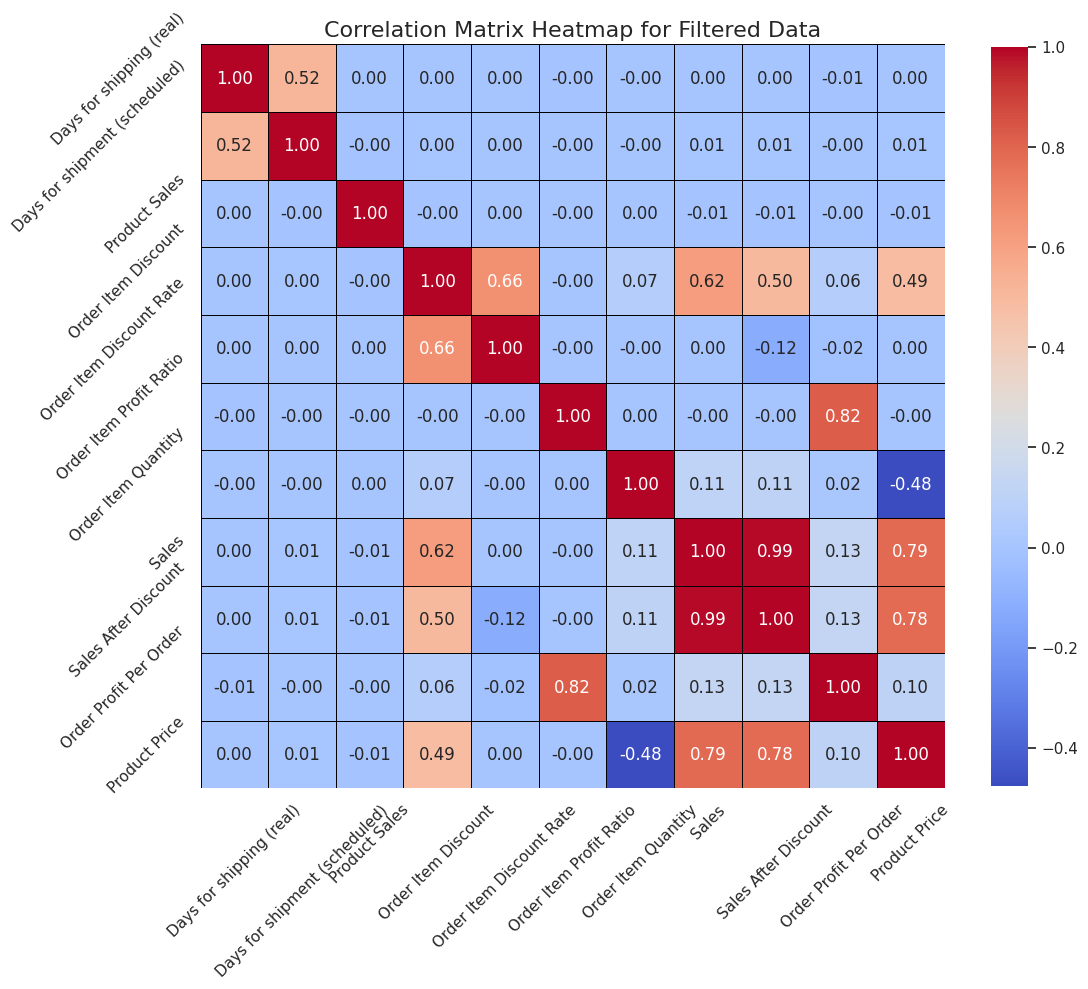

In [ ]:
# Create a correlation matrix
correlation_matrix = filtered_df[numeric_columns].corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 12))

# Create a heatmap with annotations
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            square=True, cbar_kws={"shrink": .8},
            linewidths=0.5, linecolor='black')  # Add linewidths and linecolor for gaps

# Title and labels
plt.title('Correlation Matrix Heatmap for Filtered Data', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=45)

# Show the heatmap
plt.show()

In [ ]:
# Find pairs of features with correlation greater than 0.7
high_corr = correlation_matrix[(correlation_matrix > 0.7) | (correlation_matrix < -0.7)]

# Get unique pairs (avoid duplicates by ensuring (A, B) is treated the same as (B, A))
high_corr_pairs = set()

for column in high_corr.columns:
    for index in high_corr.index:
        if column != index and (high_corr.loc[index, column] > 0.7 or high_corr.loc[index, column] < -0.7):
            # Create a sorted tuple to avoid duplicate pairs
            pair = tuple(sorted((index, column)))
            high_corr_pairs.add((pair[0], pair[1], high_corr.loc[index, column]))

# Create a DataFrame to display the results
high_corr_df = pd.DataFrame(list(high_corr_pairs), columns=['Feature 1', 'Feature 2', 'Correlation'])
high_corr_df = high_corr_df.sort_values(by='Correlation', ascending=False)  # Sort by correlation value

# Print the unique high correlation pairs
print(high_corr_df)

                 Feature 1               Feature 2  Correlation
0                    Sales    Sales After Discount     0.989744
3  Order Item Profit Ratio  Order Profit Per Order     0.823689
1            Product Price                   Sales     0.789948
2            Product Price    Sales After Discount     0.781781


From the table above, we can see there's been quite a few columns that are deemed to be correlated. However, we will not decide to drop them now and would do so in the modelling phase as the model may be able to pick up nuances on which columns amongst the features are significant.

# Analysis on column values

Check for null values

In [ ]:
missing_values = df.isnull().sum()

# Filter out columns with no missing values
missing_values = missing_values[missing_values > 0]

# Print the columns with missing values and their counts
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Series([], dtype: int64)


High Cardinality Columns

In [ ]:
# Define a threshold for high cardinality
threshold = 20  # You can adjust this based on your context

# Identify high cardinality columns
high_cardinality_columns = [col for col in remaining_columns if df[col].nunique() > threshold]

# Print the high cardinality columns
print("High Cardinality Columns (more than {} unique values):".format(threshold))
for col in high_cardinality_columns:
    print(f"{col}: {df[col].nunique()} unique values")

High Cardinality Columns (more than 20 unique values):
Category Name: 50 unique values
Customer Id: 20652 unique values
Customer City: 563 unique values
Customer State: 44 unique values
Customer Street: 7458 unique values
Customer Zipcode: 995 unique values
Latitude: 11250 unique values
Longitude: 4487 unique values
Order City: 3597 unique values
Order Country: 164 unique values
Order Id: 65752 unique values
Order Item Id: 180519 unique values
Order Region: 23 unique values
Order State: 1089 unique values
Product Card Id: 118 unique values
Product Category Id: 51 unique values
Product Name: 118 unique values


Based on the above, we will drop columns based on best judgment.

In [ ]:
columns_to_drop = [
    "Customer Id",
#    "Customer City",
#    "Customer Street",
    "Customer Zipcode",
#    "Order City",
    "Order Item Id"
]

# Drop the specified columns
filtered_df_v2 = filtered_df.drop(columns=columns_to_drop)

In [ ]:
filtered_df_v2.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Delivery Status', 'Product Sales', 'Late_delivery_risk',
       'Category Name', 'New Category Name', 'Customer City',
       'Customer Country', 'Customer Segment', 'Customer State',
       'Customer Street', 'Department Id', 'Department Name', 'Latitude',
       'Longitude', 'Market', 'Order City', 'Order Country',
       'order date (DateOrders)', 'Order Id', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Sales After Discount',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Product Card Id', 'Product Category Id', 'Product Name',
       'Product Price', 'shipping date (DateOrders)', 'Shipping Mode',
       'Order_Year', 'Order Month', 'Order Quarter', 'Shipping_Year',
       'Shipping Month', 'Shipping Quarter'],
      dtype='object')

Visualisation for Fraud

<ipython-input-97-0357b7a15614>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Order Status', y='Count', data=order_status_counts_df, palette='viridis')


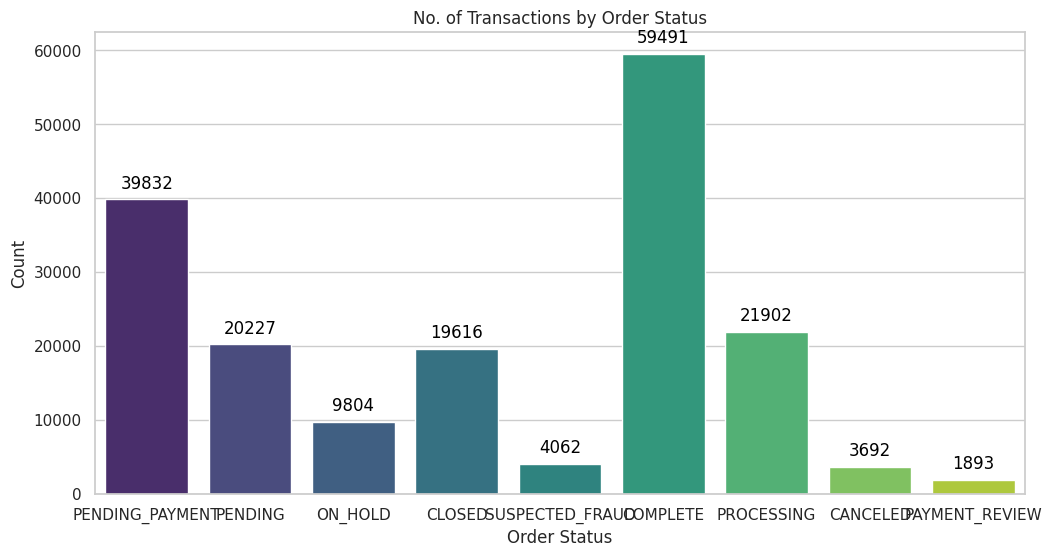

In [ ]:
# Count the number of rows for each specified order status
order_status_counts = filtered_df_v2['Order Status'].value_counts().loc[['PENDING_PAYMENT', 'PENDING', 'ON_HOLD', 'CLOSED',
       'SUSPECTED_FRAUD', 'COMPLETE', 'PROCESSING', 'CANCELED',
       'PAYMENT_REVIEW']]

# Convert the counts to a DataFrame for easier plotting
order_status_counts_df = order_status_counts.reset_index()
order_status_counts_df.columns = ['Order Status', 'Count']

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Plotting using Seaborn
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x='Order Status', y='Count', data=order_status_counts_df, palette='viridis')

# Add data values on top of each bar
for p in bar_plot.patches:
    bar_plot.annotate(f'{int(p.get_height())}',
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='bottom',
                      fontsize=12, color='black',
                      xytext=(0, 5),  # Offset the text slightly
                      textcoords='offset points')

plt.title('No. of Transactions by Order Status')
plt.xlabel('Order Status')
plt.ylabel('Count')
plt.show()

<ipython-input-98-74e21602eaf2>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Fraud Count', y='Category Name', data=top_fraud_counts_df, palette='viridis')


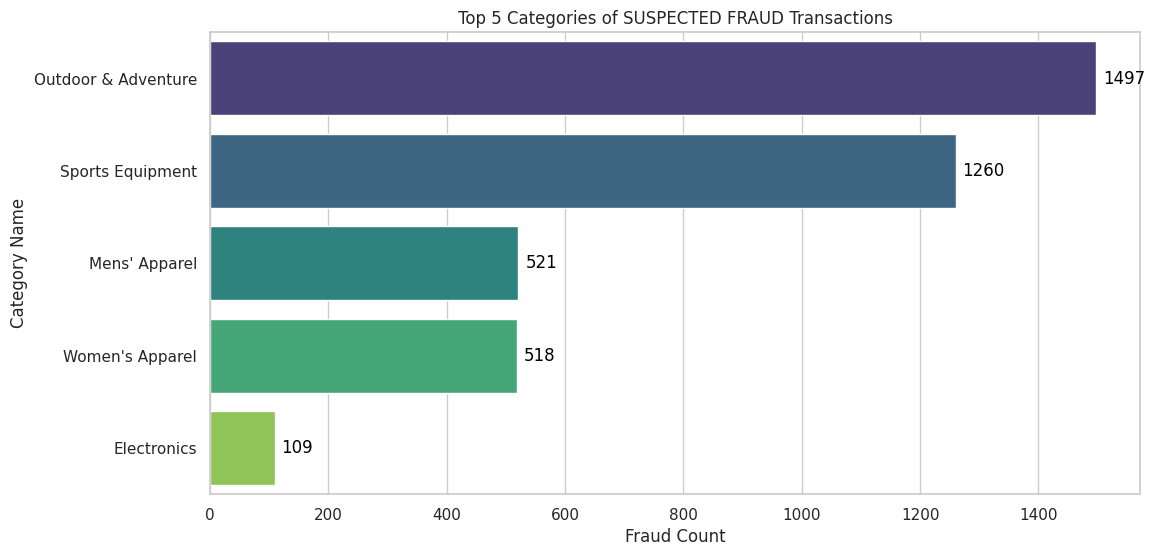

In [ ]:
fraud_counts = filtered_df_v2[filtered_df_v2['Order Status'] == 'SUSPECTED_FRAUD']['New Category Name'].value_counts()


# Convert the counts to a DataFrame for easier plotting
fraud_counts_df = fraud_counts.reset_index()
fraud_counts_df.columns = ['Category Name', 'Fraud Count']

top_fraud_counts_df = fraud_counts_df.nlargest(5, 'Fraud Count')

# Plotting
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x='Fraud Count', y='Category Name', data=top_fraud_counts_df, palette='viridis')

# Add data values on top of each bar
for p in bar_plot.patches:
    bar_plot.annotate(f'{int(p.get_width())}',
                      (p.get_width(), p.get_y() + p.get_height() / 2.),
                      ha='left', va='center',
                      fontsize=12, color='black',
                      xytext=(5, 0),  # Offset the text slightly
                      textcoords='offset points')

plt.title('Top 5 Categories of SUSPECTED FRAUD Transactions')
plt.xlabel('Fraud Count')
plt.ylabel('Category Name')
plt.show()

<ipython-input-99-b9380c960841>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Fraud Count', y='Category Name', data=top_fraud_counts_df, palette='viridis')


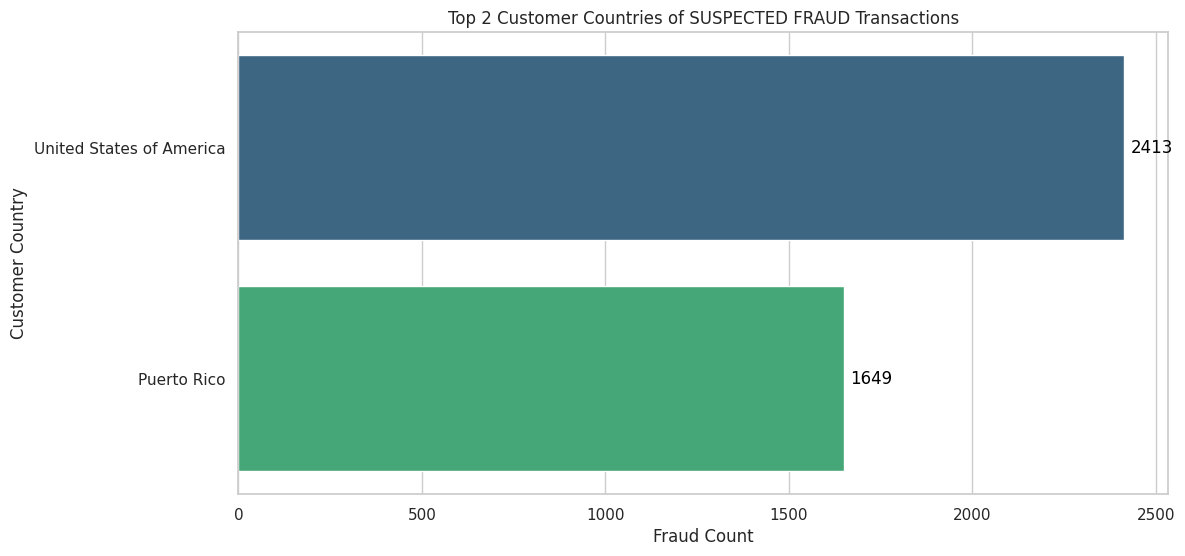

In [ ]:
customer_country = filtered_df_v2[filtered_df_v2['Order Status'] == 'SUSPECTED_FRAUD']['Customer Country'].value_counts()

# Convert the counts to a DataFrame for easier plotting
fraud_counts_df = customer_country.reset_index()
fraud_counts_df.columns = ['Category Name', 'Fraud Count']

top_fraud_counts_df = fraud_counts_df.nlargest(5, 'Fraud Count')

# Plotting
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x='Fraud Count', y='Category Name', data=top_fraud_counts_df, palette='viridis')

# Add data values on top of each bar
for p in bar_plot.patches:
    bar_plot.annotate(f'{int(p.get_width())}',
                      (p.get_width(), p.get_y() + p.get_height() / 2.),
                      ha='left', va='center',
                      fontsize=12, color='black',
                      xytext=(5, 0),  # Offset the text slightly
                      textcoords='offset points')

plt.title('Top 2 Customer Countries of SUSPECTED FRAUD Transactions')
plt.xlabel('Fraud Count')
plt.ylabel('Customer Country')
plt.show()

<ipython-input-100-6fb8c929dff0>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Fraud Count', y='Category Name', data=top_fraud_counts_df, palette='viridis')


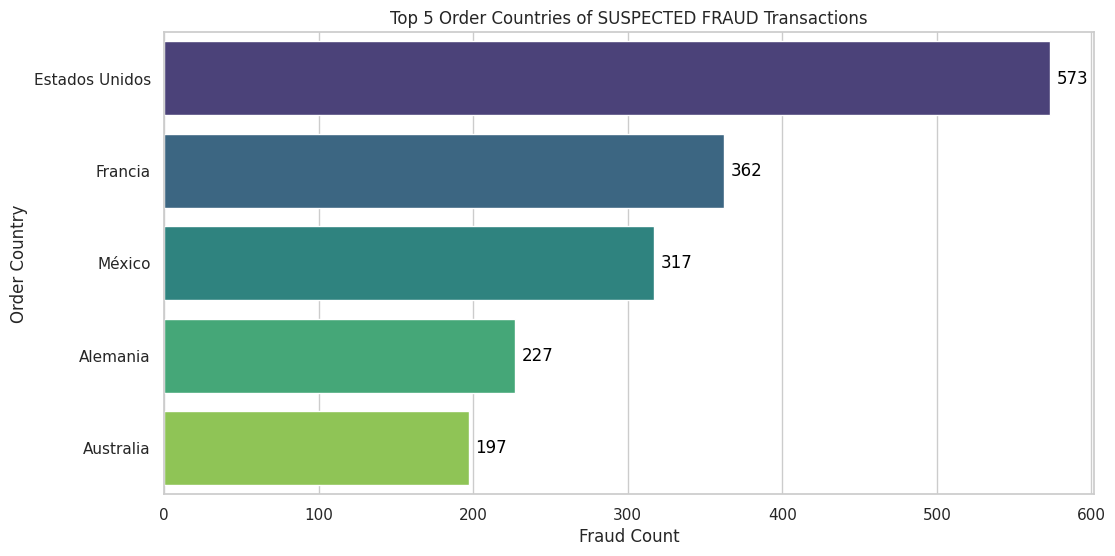

In [ ]:
order_country = filtered_df_v2[filtered_df_v2['Order Status'] == 'SUSPECTED_FRAUD']['Order Country'].value_counts()

# Convert the counts to a DataFrame for easier plotting
fraud_counts_df = order_country.reset_index()
fraud_counts_df.columns = ['Category Name', 'Fraud Count']

top_fraud_counts_df = fraud_counts_df.nlargest(5, 'Fraud Count')

# Plotting
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x='Fraud Count', y='Category Name', data=top_fraud_counts_df, palette='viridis')

# Add data values on top of each bar
for p in bar_plot.patches:
    bar_plot.annotate(f'{int(p.get_width())}',
                      (p.get_width(), p.get_y() + p.get_height() / 2.),
                      ha='left', va='center',
                      fontsize=12, color='black',
                      xytext=(5, 0),  # Offset the text slightly
                      textcoords='offset points')

plt.title('Top 5 Order Countries of SUSPECTED FRAUD Transactions')
plt.xlabel('Fraud Count')
plt.ylabel('Order Country')
plt.show()

Proportionality Analysis

How many percent is Suspected Fraud out of all of the transactions

In [ ]:
# Filter out countries for analysis
countries = filtered_df_v2['Customer Country'].unique()

# Initialize a list to store the results
results = []

# Loop through each country to calculate the fraud percentage
for country in countries:
    country_orders = filtered_df_v2[filtered_df_v2['Customer Country'] == country]
    total_orders = len(country_orders)
    suspected_fraud_orders = len(country_orders[country_orders['Order Status'] == 'SUSPECTED_FRAUD'])

    # Calculate the percentage of suspected fraud orders
    fraud_percentage = (suspected_fraud_orders / total_orders) * 100 if total_orders > 0 else 0

    # Append the results to the list
    results.append({'Customer Country': country, 'Total Orders' : total_orders , 'Suspected Orders' : suspected_fraud_orders, 'Fraud Percentage': fraud_percentage})

# Convert results to a DataFrame
fraud_percentage_df = pd.DataFrame(results).sort_values(by='Fraud Percentage', ascending=False)
fraud_percentage_df.head(10)


Customer Country  Total Orders  Suspected Orders  Fraud Percentage
1               Puerto Rico         69373              1649          2.377005
0  United States of America        111146              2413          2.171018

In [ ]:
# Filter out countries for analysis
countries = filtered_df_v2['Order Country'].unique()

# Initialize a list to store the results
results = []

# Loop through each country to calculate the fraud percentage
for country in countries:
    country_orders = filtered_df_v2[filtered_df_v2['Order Country'] == country]
    total_orders = len(country_orders)
    suspected_fraud_orders = len(country_orders[country_orders['Order Status'] == 'SUSPECTED_FRAUD'])

    # Calculate the percentage of suspected fraud orders
    fraud_percentage = (suspected_fraud_orders / total_orders) * 100 if total_orders > 0 else 0

    # Append the results to the list
    if suspected_fraud_orders > 0:
        results.append({'Order Country': country, 'Total Orders' : total_orders , 'Suspected Orders' : suspected_fraud_orders, 'Fraud Percentage': fraud_percentage})

# Convert results to a DataFrame
fraud_percentage_df = pd.DataFrame(results).sort_values(by='Fraud Percentage', ascending=False)
fraud_percentage_df.head(10)


Order Country  Total Orders  Suspected Orders  Fraud Percentage
101            Etiopía            25                 5         20.000000
56              Guinea            45                 6         13.333333
98           Hong Kong            73                 9         12.328767
57               Siria            63                 7         11.111111
76           Martinica           120                12         10.000000
80   Trinidad y Tobago           138                10          7.246377
100              Qatar            42                 3          7.142857
42               Yemen            71                 5          7.042254
38            Portugal           343                21          6.122449
54             Liberia            34                 2          5.882353

In [ ]:
# Filter out Payment Type for analysis
payment_types = filtered_df_v2['Type'].unique()

# Initialize a list to store the results
results = []

# Loop through each country to calculate the fraud percentage
for payment_type in payment_types:
    payment_type_orders = filtered_df_v2[filtered_df_v2['Type'] == payment_type]
    total_orders = len(payment_type_orders)
    suspected_fraud_orders = len(payment_type_orders[payment_type_orders['Order Status'] == 'SUSPECTED_FRAUD'])

    # Calculate the percentage of suspected fraud orders
    fraud_percentage = (suspected_fraud_orders / total_orders) * 100 if total_orders > 0 else 0

    # Append the results to the list
    if suspected_fraud_orders > 0:
        results.append({'Payment Type': payment_type, 'Total Orders' : total_orders , 'Suspected Orders' : suspected_fraud_orders, 'Fraud Percentage': fraud_percentage})

# Convert results to a DataFrame
fraud_percentage_df = pd.DataFrame(results).sort_values(by='Fraud Percentage', ascending=False)
fraud_percentage_df.head(10)


Payment Type  Total Orders  Suspected Orders  Fraud Percentage
0     TRANSFER         49883              4062          8.143055

In [ ]:
# Filter out category for analysis
category_name = filtered_df_v2['New Category Name'].unique()

# Initialize a list to store the results
results = []

# Loop through each country to calculate the fraud percentage
for category in category_name:
    category_orders = filtered_df_v2[filtered_df_v2['New Category Name'] == category]
    total_orders = len(category_orders)
    suspected_fraud_orders = len(category_orders[category_orders['Order Status'] == 'SUSPECTED_FRAUD'])

    # Calculate the percentage of suspected fraud orders
    fraud_percentage = (suspected_fraud_orders / total_orders) * 100 if total_orders > 0 else 0

    # Append the results to the list
    results.append({'Category': category, 'Total Orders' : total_orders , 'Suspected Orders' : suspected_fraud_orders, 'Fraud Percentage': fraud_percentage})

# Convert results to a DataFrame
fraud_percentage_df = pd.DataFrame(results).sort_values(by='Fraud Percentage', ascending=False)
fraud_percentage_df


Category  Total Orders  Suspected Orders  Fraud Percentage
9      Health and Beauty           362                11          3.038674
0            Kids & Toys          2973                79          2.657249
7                 Crafts           484                12          2.479339
5            Electronics          4621               109          2.358797
4          Mens' Apparel         22522               521          2.313294
1        Women's Apparel         22659               518          2.286067
3    Outdoor & Adventure         67308              1497          2.224104
2       Sports Equipment         56876              1260          2.215346
8  Media & Entertainment          2431                50          2.056767
6       sports Equipment           283                 5          1.766784

Analyse for some columns and put it all in a table to see.

In [ ]:
fraud_list = [
    "Type",
    "New Category Name",
    "Customer City",
    "Customer Country",
    "Customer Segment",
    "Customer State",
    "Department Name",
    "Market",
    "Order City",
    "Order Country",
    "Order Item Discount",
    "Order Item Discount Rate",
    "Order Item Profit Ratio",
    "Order Item Quantity",
    "Order Region",
    "Order State",
    "Product Name",
    "Shipping Mode",
    'Order_Year',
    'Order Month',
    'Order Quarter',
    'Shipping_Year',
    'Shipping Month',
    'Shipping Quarter'
]

In [ ]:
filtered_df_v2.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Delivery Status', 'Product Sales', 'Late_delivery_risk',
       'Category Name', 'New Category Name', 'Customer City',
       'Customer Country', 'Customer Segment', 'Customer State',
       'Customer Street', 'Department Id', 'Department Name', 'Latitude',
       'Longitude', 'Market', 'Order City', 'Order Country',
       'order date (DateOrders)', 'Order Id', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Sales After Discount',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Product Card Id', 'Product Category Id', 'Product Name',
       'Product Price', 'shipping date (DateOrders)', 'Shipping Mode',
       'Order_Year', 'Order Month', 'Order Quarter', 'Shipping_Year',
       'Shipping Month', 'Shipping Quarter'],
      dtype='object')

In [ ]:
results = []

for column in fraud_list:
    # Filter out category for analysis
    unique_column_values = filtered_df_v2[column].unique()

    # Loop through each country to calculate the fraud percentage
    for column_value in unique_column_values:
        column_orders = filtered_df_v2[filtered_df_v2[column] == column_value]
        total_orders = len(column_orders)
        suspected_fraud_orders = len(column_orders[column_orders['Order Status'] == 'SUSPECTED_FRAUD'])

        # Calculate the percentage of suspected fraud orders
        fraud_percentage = (suspected_fraud_orders / total_orders) * 100 if total_orders > 0 else 0

        # Append the results to the list
        results.append({'Column': column, 'Column Value' : column_value , 'Total Orders' : total_orders , 'Suspected Orders' : suspected_fraud_orders, 'Fraud Percentage': int(fraud_percentage)})

# Convert results to a DataFrame
fraud_percentage_df = pd.DataFrame(results).sort_values(by='Fraud Percentage', ascending=False)
fraud_percentage_df


Column  Column Value  Total Orders  Suspected Orders  \
3999   Order City     Kastamonu             2                 2   
3476   Order City        Kindia             6                 6   
6656  Order State     Kastamonu             2                 2   
4211   Order City       Ar Raqa             2                 2   
2052   Order City    San Severo             3                 3   
...           ...           ...           ...               ...   
1821   Order City    Pine Bluff             5                 0   
3791   Order City          Ilam             5                 0   
3790   Order City  Oleksandriya             8                 0   
3789   Order City       Issoire             2                 0   
0            Type       PAYMENT         41725                 0   

      Fraud Percentage  
3999               100  
3476               100  
6656               100  
4211               100  
2052               100  
...                ...  
1821                 0  
3791                 0  
3790                 0  
3789                 0  
0                    0  

[6879 rows x 5 columns]

In [ ]:
filtered_fraud_percentage_df = fraud_percentage_df[fraud_percentage_df["Fraud Percentage"] > 50].reset_index()
print(filtered_fraud_percentage_df["Column"].unique())

['Order City' 'Order State' 'Order Item Discount']


In [ ]:
average_df = filtered_fraud_percentage_df.groupby("Column")["Fraud Percentage"].mean()
average_df

Column
Order City              81.333333
Order Item Discount    100.000000
Order State            100.000000
Name: Fraud Percentage, dtype: float64

In [ ]:
# Group by 'ColumnB' and calculate the mode of 'ColumnA'
mode_df = filtered_fraud_percentage_df.groupby("Column")["Fraud Percentage"].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None).reset_index()

print(mode_df)

                Column  Fraud Percentage
0           Order City               100
1  Order Item Discount               100
2          Order State               100


Geospatial Analysis

In [ ]:
import folium

fraud_data = filtered_df_v2[filtered_df_v2['Order Status'] == 'SUSPECTED_FRAUD']

# Create a map centered around the mean latitude and longitude
map_center = [filtered_df_v2['Latitude'].mean(), filtered_df_v2['Longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=2)

# Add suspected fraud orders to the map
for index, row in fraud_data.iterrows():
    folium.CircleMarker(
        location=(row['Latitude'], row['Longitude']),
        radius=5,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.6,
        popup=f"Order ID: {row['Order Id']}<br>Category: {row['Category Name']}"
    ).add_to(m)

# Show the map
m.save('fraud_map.html')  # Save the map to an HTML file
  # Display the map in a Jupyter Notebook
m

# Data Modelling

In [ ]:
filtered_df_v2.head()

Type  Days for shipping (real)  Days for shipment (scheduled)  \
0   PAYMENT                         5                              4   
1   PAYMENT                         5                              4   
2  TRANSFER                         6                              2   
3     DEBIT                         2                              4   
4     DEBIT                         2                              4   

    Delivery Status  Product Sales Late_delivery_risk     Category Name  \
0     Late delivery     314.640015                  1  Kids' Golf Clubs   
1     Late delivery     311.359985                  1   Women's Apparel   
2     Late delivery     309.720001                  1   Women's Apparel   
3  Advance shipping     304.809998                  0            Cleats   
4  Advance shipping     298.250000                  0            Cleats   

  New Category Name     Customer City          Customer Country  ...  \
0       Kids & Toys  South Ozone Park  United States of America  ...   
1   Women's Apparel  South Ozone Park  United States of America  ...   
2   Women's Apparel            Caguas               Puerto Rico  ...   
3  Sports Equipment            Caguas               Puerto Rico  ...   
4  Sports Equipment            Caguas               Puerto Rico  ...   

                           Product Name Product Price  \
0     Garmin Forerunner 910XT GPS Watch    399.989990   
1  Nike Men's Dri-FIT Victory Golf Polo     50.000000   
2  Nike Men's Dri-FIT Victory Golf Polo     50.000000   
3      Perfect Fitness Perfect Rip Deck     59.990002   
4      Perfect Fitness Perfect Rip Deck     59.990002   

  shipping date (DateOrders)   Shipping Mode Order_Year  Order Month  \
0        2017-09-30 09:06:00  Standard Class       2017            9   
1        2017-09-30 09:06:00  Standard Class       2017            9   
2        2017-09-30 08:56:00    Second Class       2017            9   
3        2017-09-30 07:53:00  Standard Class       2017            9   
4        2017-09-30 07:53:00  Standard Class       2017            9   

   Order Quarter Shipping_Year Shipping Month Shipping Quarter  
0              3          2017              9                3  
1              3          2017              9                3  
2              3          2017              9                3  
3              3          2017              9                3  
4              3          2017              9                3  

[5 rows x 44 columns]

In [ ]:
filtered_df_v2['Fraud Flag'] = filtered_df_v2['Order Status'].apply(lambda x: 1 if x == 'SUSPECTED_FRAUD' else 0)
filtered_df_v2

Type  Days for shipping (real)  Days for shipment (scheduled)  \
0        PAYMENT                         5                              4   
1        PAYMENT                         5                              4   
2       TRANSFER                         6                              2   
3          DEBIT                         2                              4   
4          DEBIT                         2                              4   
...          ...                       ...                            ...   
180514  TRANSFER                         2                              1   
180515  TRANSFER                         2                              1   
180516  TRANSFER                         2                              1   
180517  TRANSFER                         2                              1   
180518  TRANSFER                         2                              1   

         Delivery Status  Product Sales Late_delivery_risk  \
0          Late delivery     314.640015                  1   
1          Late delivery     311.359985                  1   
2          Late delivery     309.720001                  1   
3       Advance shipping     304.809998                  0   
4       Advance shipping     298.250000                  0   
...                  ...            ...                ...   
180514     Late delivery     399.980011                  1   
180515     Late delivery     395.980011                  1   
180516     Late delivery     391.980011                  1   
180517     Late delivery     387.980011                  1   
180518     Late delivery     383.980011                  1   

               Category Name    New Category Name     Customer City  \
0           Kids' Golf Clubs          Kids & Toys  South Ozone Park   
1            Women's Apparel      Women's Apparel  South Ozone Park   
2            Women's Apparel      Women's Apparel            Caguas   
3                     Cleats     Sports Equipment            Caguas   
4                     Cleats     Sports Equipment            Caguas   
...                      ...                  ...               ...   
180514  Indoor/Outdoor Games  Outdoor & Adventure         Riverside   
180515      Cardio Equipment     Sports Equipment         Riverside   
180516        Men's Footwear        Mens' Apparel         Riverside   
180517               Fishing  Outdoor & Adventure         Riverside   
180518  Indoor/Outdoor Games  Outdoor & Adventure         Riverside   

                Customer Country  ... Product Price  \
0       United States of America  ...    399.989990   
1       United States of America  ...     50.000000   
2                    Puerto Rico  ...     50.000000   
3                    Puerto Rico  ...     59.990002   
4                    Puerto Rico  ...     59.990002   
...                          ...  ...           ...   
180514  United States of America  ...     49.980000   
180515  United States of America  ...     99.989998   
180516  United States of America  ...    129.990005   
180517  United States of America  ...    399.980011   
180518  United States of America  ...     49.980000   

       shipping date (DateOrders)   Shipping Mode Order_Year Order Month  \
0             2017-09-30 09:06:00  Standard Class       2017           9   
1             2017-09-30 09:06:00  Standard Class       2017           9   
2             2017-09-30 08:56:00    Second Class       2017           9   
3             2017-09-30 07:53:00  Standard Class       2017           9   
4             2017-09-30 07:53:00  Standard Class       2017           9   
...                           ...             ...        ...         ...   
180514        2015-02-01 00:08:00     First Class       2015           1   
180515        2015-02-01 00:08:00     First Class       2015           1   
180516        2015-02-01 00:08:00     First Class       2015           1   
180517        2015-02-01 00:08:00     First Class       2015        

Determine if there's a significant relationship between the payment type and the fraud label.

In [ ]:
from scipy.stats import chi2_contingency
# Create a contingency table
contingency_table = pd.crosstab(filtered_df_v2['Type'], filtered_df_v2['Fraud Flag'])
print(contingency_table)

Fraud Flag      0     1
Type                   
CASH        19616     0
DEBIT       69295     0
PAYMENT     41725     0
TRANSFER    45821  4062


In [ ]:
possible_columns = ['Order State','Order City','Order Item Discount','Type']

for col in fraud_list:
    contingency_table = pd.crosstab(filtered_df_v2[col], filtered_df_v2['Fraud Flag'])
    print("\n")
    print(col)

    # Perform the Chi-Square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Output the results
    print("Chi-Squared Statistic:", chi2)
    print("P-Value:", p)
    print("Degrees of Freedom:", dof)
    print("Expected Frequencies:\n", expected)

    alpha = 0.05  # significance level
    if p < alpha:
        print(f"Reject the null hypothesis - There is a significant association between {col} and Fraud.")
    else:
        print(f"Fail to reject the null hypothesis - There is no significant association between {col} and Fraud.")



Type
Chi-Squared Statistic: 10882.639839127365
P-Value: 0.0
Degrees of Freedom: 3
Expected Frequencies:
 [[19174.60495571   441.39504429]
 [67735.73870341  1559.26129659]
 [40786.11295764   938.88704236]
 [48760.54338324  1122.45661676]]
Reject the null hypothesis - There is a significant association between Type and Fraud.


New Category Name
Chi-Squared Statistic: 5.40285910186637
P-Value: 0.7978718692186199
Degrees of Freedom: 9
Expected Frequencies:
 [[4.73109135e+02 1.08908647e+01]
 [4.51701924e+03 1.03980755e+02]
 [3.53854353e+02 8.14564672e+00]
 [2.90610219e+03 6.68978113e+01]
 [2.37629816e+03 5.47018430e+01]
 [2.20152148e+04 5.06785236e+02]
 [6.57934498e+04 1.51455025e+03]
 [5.55961884e+04 1.27981161e+03]
 [2.21491320e+04 5.09867981e+02]
 [2.76631994e+02 6.36800558e+00]]
Fail to reject the null hypothesis - There is no significant association between New Category Name and Fraud.


Customer City
Chi-Squared Statistic: 1981.0365131022527
P-Value: 3.84005955363135e-157
Degrees o

Reject the null hypothesis - There is a significant association between Type and Fraud.
Reject the null hypothesis - There is a significant association between Customer City and Fraud.
Reject the null hypothesis - There is a significant association between Customer Country and Fraud.
Reject the null hypothesis - There is a significant association between Customer Segment and Fraud.
Reject the null hypothesis - There is a significant association between Order City and Fraud.
Reject the null hypothesis - There is a significant association between Order Country and Fraud.
Reject the null hypothesis - There is a significant association between Order Region and Fraud.

In [ ]:
# Define a threshold for high cardinality
threshold = 20  # You can adjust this based on your context

# Identify high cardinality columns
high_cardinality_columns = [col for col in filtered_df_v2.columns if filtered_df_v2[col].nunique() > 1]

# Print the high cardinality columns
print("High Cardinality Columns (more than {} unique values):".format(threshold))
for col in high_cardinality_columns:
    print(f"{col}: {filtered_df_v2[col].nunique()} unique values")

High Cardinality Columns (more than 20 unique values):
Type: 4 unique values
Days for shipping (real): 7 unique values
Days for shipment (scheduled): 4 unique values
Delivery Status: 4 unique values
Product Sales: 2927 unique values
Late_delivery_risk: 2 unique values
Category Name: 50 unique values
New Category Name: 10 unique values
Customer City: 563 unique values
Customer Country: 2 unique values
Customer Segment: 3 unique values
Customer State: 44 unique values
Customer Street: 7458 unique values
Department Id: 11 unique values
Department Name: 11 unique values
Latitude: 11250 unique values
Longitude: 4487 unique values
Market: 5 unique values
Order City: 3597 unique values
Order Country: 164 unique values
order date (DateOrders): 65752 unique values
Order Id: 65752 unique values
Order Item Discount: 1017 unique values
Order Item Discount Rate: 18 unique values
Order Item Profit Ratio: 162 unique values
Order Item Quantity: 5 unique values
Sales: 193 unique values
Sales After Disc

In [ ]:
filtered_df_v2.shape

(180519, 45)

In [ ]:
from sklearn.preprocessing import LabelEncoder

subset_df = filtered_df_v2[['Type','Customer City','Customer Country','Customer Segment','Order City','Order Country','Order Region','Fraud Flag']]
subset_df = filtered_df_v2[['Type','Customer City','Customer Country','Customer State','Customer Segment','Order City','Order Country','Order Item Discount','Order Region','Order State','Shipping Mode','Order Month','Shipping Month','Fraud Flag']]

# Step 2: Label Encoding for the target variable 'Fraud Flag'
label_encoder = LabelEncoder()

# Step 3: Label Encode each categorical feature except 'Fraud Flag'
for column in subset_df.columns:
    if column != 'Fraud Flag':
        new_column = f'Label_{column}'
        subset_df[new_column] = label_encoder.fit_transform(subset_df[column])

subset_df.to_csv("mapped_values.csv")

# Step 4: Split the features and target variable
x = subset_df.drop(['Type','Customer City','Customer Country','Customer Segment','Order City','Order Country','Order Region','Fraud Flag'], axis=1)  # Features
x = subset_df.drop(['Type','Customer City','Customer Country','Customer State','Customer Segment','Order City','Order Country','Order Item Discount','Order Region','Order State','Shipping Mode','Order Month','Shipping Month','Fraud Flag'], axis=1)  # Features
y = subset_df['Fraud Flag']  # Target variable

<ipython-input-120-7b487dd43d38>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df[new_column] = label_encoder.fit_transform(subset_df[column])
<ipython-input-120-7b487dd43d38>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df[new_column] = label_encoder.fit_transform(subset_df[column])
<ipython-input-120-7b487dd43d38>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from collections import Counter

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(x, y)

In [ ]:
# Combine X_smote and y_smote into a single DataFrame
df_smote = pd.DataFrame(X_smote, columns=x.columns)  # Convert X_smote to DataFrame with column names from x
df_smote['Fraud Flag'] = y_smote  # Add the target column

# Save to CSV
df_smote.to_csv('smote_resampled_data.csv', index=False)

In [ ]:
# from scipy.sparse import csr_matrix

# sparse_matrix = csr_matrix(X_smote.values)

# # This will save memory, especially for large datasets with many zeros
# print(f"Memory usage before (dense): {X_smote.memory_usage().sum()} bytes")
# print(f"Memory usage after (sparse): {sparse_matrix.data.nbytes} bytes")

In [ ]:
import lightgbm as lgb

X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=99)
data_train = lgb.Dataset(X_train, label=y_train)
data_test = lgb.Dataset(X_test, label=y_test)

In [ ]:
# # First, split the original dataset into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=99)

# # Apply SMOTE only to the training set to create a balanced training dataset
# smote = SMOTE(random_state=42)
# X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# # Prepare LightGBM datasets
# data_train = lgb.Dataset(X_train_smote, label=y_train_smote)
# data_test = lgb.Dataset(X_test, label=y_test)


In [ ]:
params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'auc',
    'num_leaves': 20,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': -1,
    'lambda_l1': 1,
    'lambda_l2': 1,
    'seed': 123
}

In [ ]:
# from sklearn.model_selection import GridSearchCV

# # Define the parameter grid
# param_grid = {
#     'num_leaves': [20, 31, 40],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'feature_fraction': [0.8, 0.9, 1.0],
#     'bagging_fraction': [0.7, 0.8, 0.9],
#     'lambda_l1': [0, 0.5, 1],
#     'lambda_l2': [0, 0.5, 1],
#     'bagging_freq': [1, 5, 10]
# }

# model = lgb.LGBMClassifier()

# # Create the GridSearchCV object
# grid_search = GridSearchCV(model, param_grid, scoring='roc_auc', cv=5, n_jobs=-1)

# # Fit the model
# grid_search.fit(X_train_smote, y_train_smote)

# # Get the best parameters
# print("Best parameters found: ", grid_search.best_params_)
# print("Best AUC score: ", grid_search.best_score_)

In [ ]:
# Train the LightGBM model
model = lgb.train(params,               # Your parameters
                  data_train,             # Training data
                  num_boost_round=100,     # Number of boosting rounds
                  valid_sets=[data_test],   # Validation data -  'verbose_eval' is replaced with 'valid_sets'
                  )

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = model.predict(X_test)
y_pred = [1 if y > 0.5 else 0 for y in y_pred]
print(f'Accuracy for the baseline model is: {accuracy_score(y_test, y_pred)}')

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

Accuracy for the baseline model is: 0.8946063499709562
Accuracy: 0.8946063499709562
              precision    recall  f1-score   support

           0       0.98      0.80      0.88     35107
           1       0.83      0.98      0.90     35476

    accuracy                           0.89     70583
   macro avg       0.91      0.89      0.89     70583
weighted avg       0.91      0.89      0.89     70583



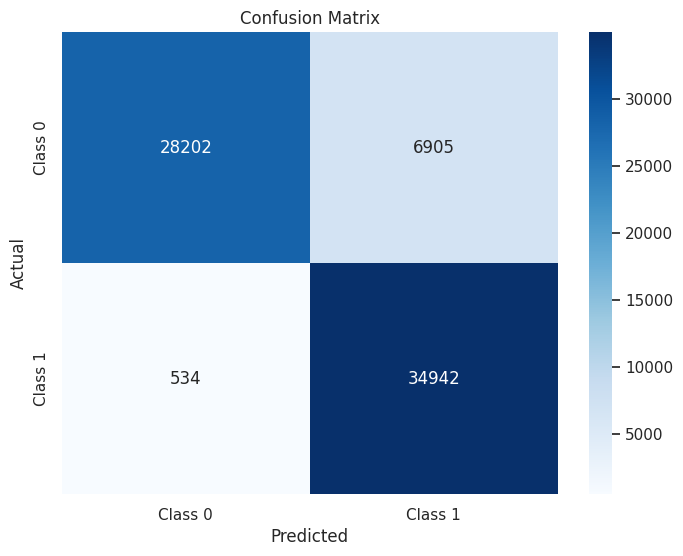

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
# Predict class labels on the test set
y_pred_prob = model.predict(X_test)  # X_test: your test features
y_pred = np.round(y_pred_prob)       # Round probabilities to get binary predictions (0 or 1)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)  # y_test: your test labels

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'],  # Update according to your class names
            yticklabels=['Class 0', 'Class 1'])  # Update according to your class names
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# # Step 2: Get feature importances
# importances = model.feature_importances_

# # Step 3: Create a DataFrame for visualization
# feature_importance_df = pd.DataFrame({
#     'Feature': X_test.columns,
#     'Importance': importances
# }).sort_values(by='Importance', ascending=False)

# # Step 4: Display the feature importances
# print(feature_importance_df)

In [ ]:
import shap
shap.initjs()

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

/usr/local/lib/python3.10/dist-packages/shap/explainers/_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')


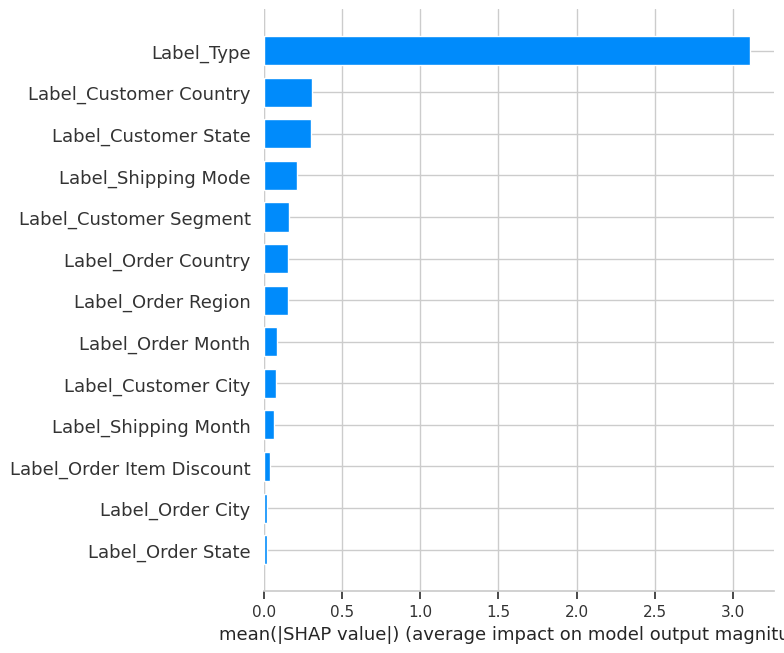

In [ ]:
shap.summary_plot(shap_values, X_test, plot_type='bar')

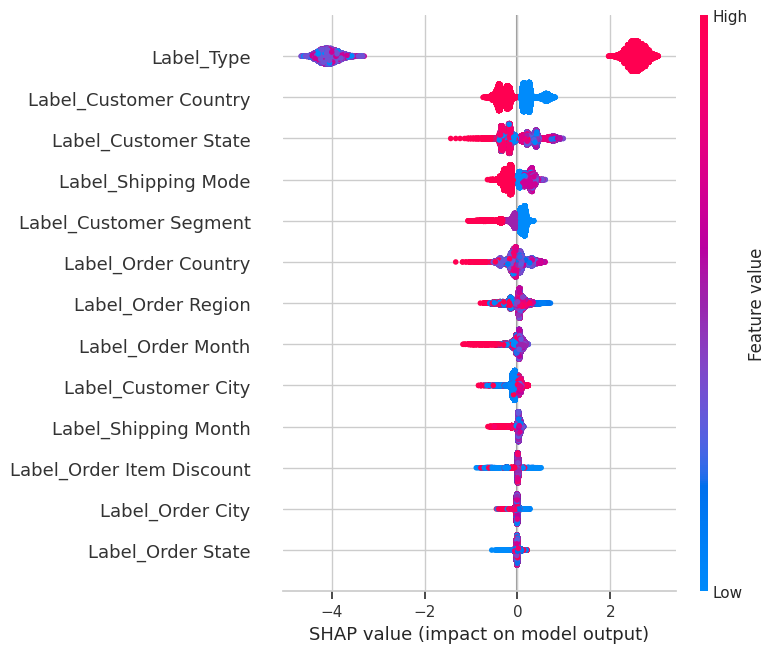

In [ ]:
#%%md We can combine feature importance with feature effects. Each point on the summary plot is a Shapley value for a feature and an #%%md instance. The position on the y-axis is determined by the feature and on the x-axis by the Shapley value. The color represents the value of #%%md the feature from low to high. Overlapping points are jittered in y-axis direction, so we get a sense of the distribution of the #%%md Shapley values per feature. The features are ordered according to their importance.
# summarize the effects of all the features

import matplotlib.pyplot as plt

# Adjust the figure size before the SHAP plot
plt.figure(figsize=(100,100))  # Customize the size (width, height)


shap.summary_plot(shap_values, X_test, plot_type="dot") #default
#Shows the summary of how the MODEL is influence by different features and sorted by importance.
plt.show()


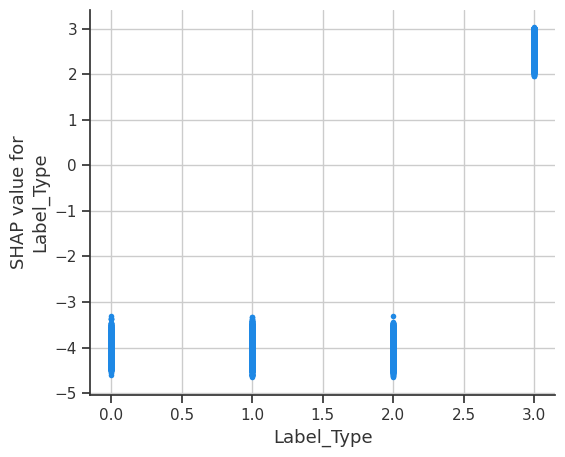

In [ ]:
#%%md We can also plot a Shapley dependence plots. They are very intuitive. We pick a feature and for each instance, plot a point with the feature value on the x-axis and the corresponding Shapley value on the y-axis. We can think of them as an alternative to Partial #%%md
#%%md dependency plots but instead of showing average effect, we also see variance in the y-axis.

# The first argument is the feature of interest as an integer or string, followed by the shap_values and X matrix

#Dependency plots
shap.dependence_plot("Label_Type", shap_values, X_test, interaction_index=None)

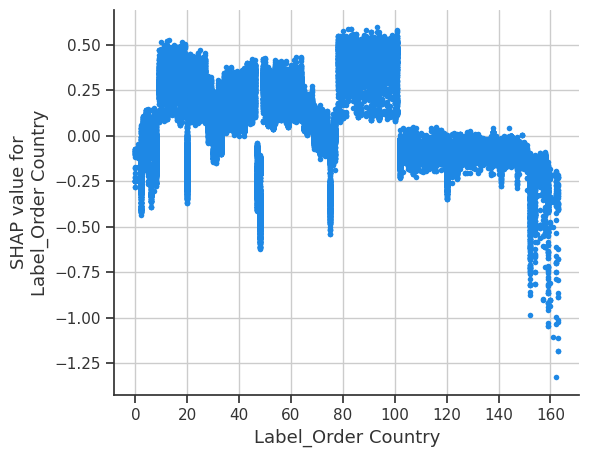

In [ ]:
#%%md We can also plot a Shapley dependence plots. They are very intuitive. We pick a feature and for each instance, plot a point with the feature value on the x-axis and the corresponding Shapley value on the y-axis. We can think of them as an alternative to Partial #%%md
#%%md dependency plots but instead of showing average effect, we also see variance in the y-axis.

# The first argument is the feature of interest as an integer or string, followed by the shap_values and X matrix

#Dependency plots
shap.dependence_plot("Label_Order Country", shap_values, X_test, interaction_index=None)

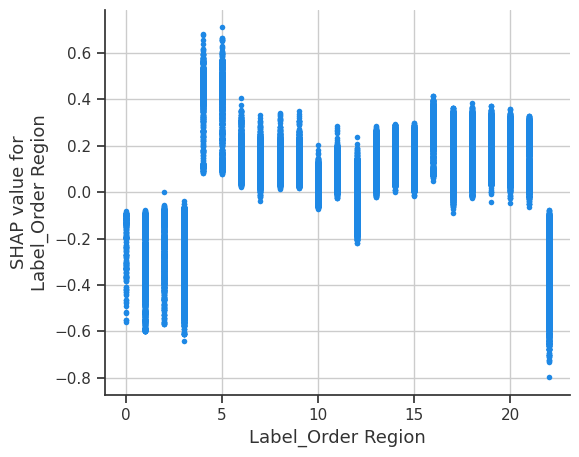

In [ ]:
#%%md We can also plot a Shapley dependence plots. They are very intuitive. We pick a feature and for each instance, plot a point with the feature value on the x-axis and the corresponding Shapley value on the y-axis. We can think of them as an alternative to Partial #%%md
#%%md dependency plots but instead of showing average effect, we also see variance in the y-axis.

# The first argument is the feature of interest as an integer or string, followed by the shap_values and X matrix

#Dependency plots
shap.dependence_plot("Label_Order Region", shap_values, X_test, interaction_index=None)

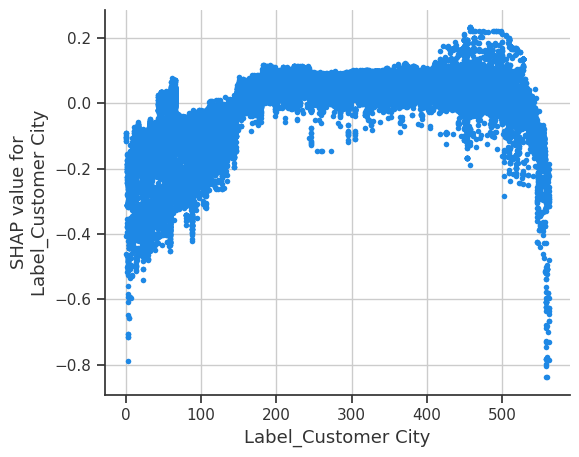

In [ ]:
#%%md We can also plot a Shapley dependence plots. They are very intuitive. We pick a feature and for each instance, plot a point with the feature value on the x-axis and the corresponding Shapley value on the y-axis. We can think of them as an alternative to Partial #%%md
#%%md dependency plots but instead of showing average effect, we also see variance in the y-axis.

# The first argument is the feature of interest as an integer or string, followed by the shap_values and X matrix

#Dependency plots
shap.dependence_plot("Label_Customer City", shap_values, X_test, interaction_index=None)

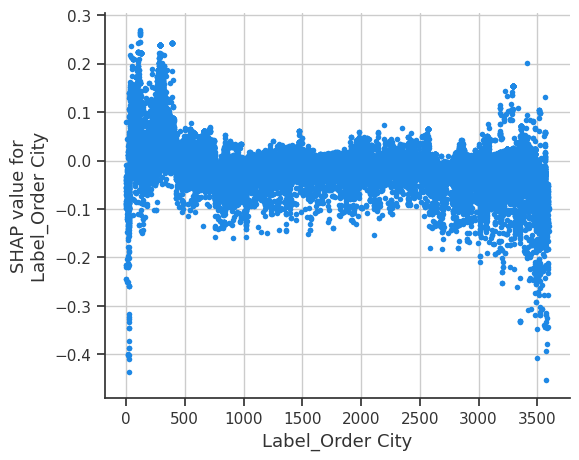

In [ ]:
#%%md We can also plot a Shapley dependence plots. They are very intuitive. We pick a feature and for each instance, plot a point with the feature value on the x-axis and the corresponding Shapley value on the y-axis. We can think of them as an alternative to Partial #%%md
#%%md dependency plots but instead of showing average effect, we also see variance in the y-axis.

# The first argument is the feature of interest as an integer or string, followed by the shap_values and X matrix

#Dependency plots
shap.dependence_plot("Label_Order City", shap_values, X_test, interaction_index=None)

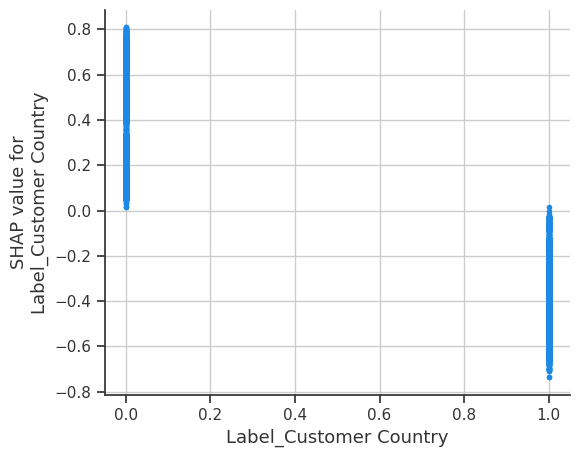

In [ ]:
#%%md We can also plot a Shapley dependence plots. They are very intuitive. We pick a feature and for each instance, plot a point with the feature value on the x-axis and the corresponding Shapley value on the y-axis. We can think of them as an alternative to Partial #%%md
#%%md dependency plots but instead of showing average effect, we also see variance in the y-axis.

# The first argument is the feature of interest as an integer or string, followed by the shap_values and X matrix

#Dependency plots
shap.dependence_plot("Label_Customer Country", shap_values, X_test, interaction_index=None)

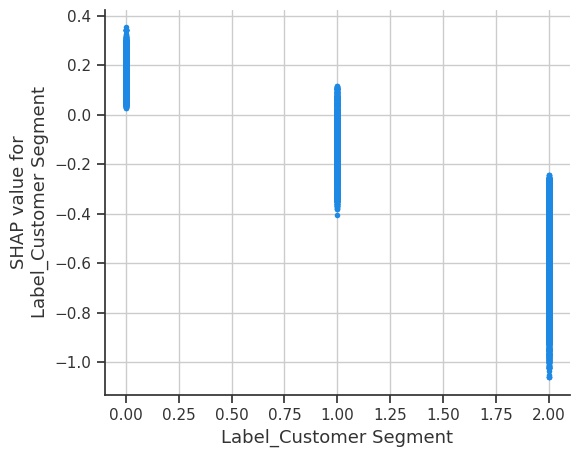

In [ ]:
#%%md We can also plot a Shapley dependence plots. They are very intuitive. We pick a feature and for each instance, plot a point with the feature value on the x-axis and the corresponding Shapley value on the y-axis. We can think of them as an alternative to Partial #%%md
#%%md dependency plots but instead of showing average effect, we also see variance in the y-axis.

# The first argument is the feature of interest as an integer or string, followed by the shap_values and X matrix

#Dependency plots
shap.dependence_plot("Label_Customer Segment", shap_values, X_test, interaction_index=None)

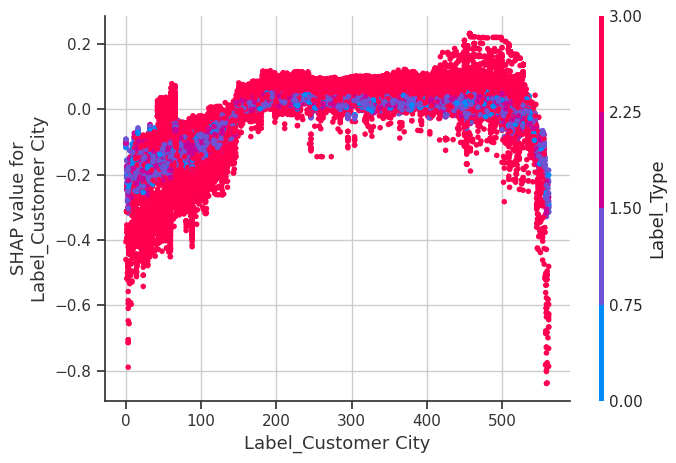

In [ ]:
#Dependency plotsinteraction_index=None
shap.dependence_plot("Label_Customer City", shap_values, X_test)

In [ ]:
#%%md We can look at the Shapley values for one instance. We see how each feature's contribution is pushing the model's output from the base #%%md value to the model output for the concrete instance. In red are features that increase the contribution, and in blue- are those that #%%md decrease. We see the concrete values of the features for that one instance (below), and their contribution.

# visualize each prediction using shapley value
preds_idx = 3
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[preds_idx,:], X_test.iloc[preds_idx,:], link='logit')

In [ ]:
#%%md We can look at the Shapley values for one instance. We see how each feature's contribution is pushing the model's output from the base #%%md value to the model output for the concrete instance. In red are features that increase the contribution, and in blue- are those that #%%md decrease. We see the concrete values of the features for that one instance (below), and their contribution.

# visualize each prediction using shapley value
preds_idx = 8904
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[preds_idx,:], X_test.iloc[preds_idx,:], link='logit')

In [ ]:
# 1. Check where the probability is less than 0.50
low_prob_indices = [i for i, prob in enumerate(y_pred_prob) if prob < 0.50]

# Choose one instance with probability < 0.50 to visualize (e.g., first instance in low_prob_indices)
if low_prob_indices:
    preds_idx = low_prob_indices[0]
else:
    print("No instances found with probability < 0.50")
    preds_idx = None

# 2. Visualize SHAP values for the selected instance
if preds_idx is not None:
    # Initialize the JS visualization for SHAP
    shap.initjs()

    # Plot the SHAP values using force_plot to show contributions
    shap.force_plot(
        explainer.expected_value,  # The base value or expected prediction
        shap_values[preds_idx, :],  # SHAP values for the selected instance
        X_test.iloc[preds_idx, :],  # Feature values for the selected instance
        link='logit'  # Use logit for probability output
    )
else:
    print("No valid instance selected.")